In [95]:
import numpy as np
from scipy import signal
from scipy.fft import rfft, rfftfreq
import matplotlib.pyplot as plt
from scipy.io import wavfile
import IPython.display as display
import math

# Sine Wave (Pure Tone)

A `sine wave` is defined by their frequency `f`, the amplitude `A` and an optional phase $\phi$ parameter.

## Global Parameters

In [121]:
# Sample Rate (Hz)
sampling_rate = 44100 
# length of the Generated Signal (s)
length = 2
# Signal Frequency (Hz)
frequency = 220
# Signal Amplitude (-1, 1)
Amplitude = 0.5
# Phase (radians)
theta = math.radians(0)
# Period (s)
period = 1/frequency

## Generate Sine Signal

In [122]:
# Set the x Axis (time)
t = np.linspace(0, length, sampling_rate * length, endpoint=False)
# Generate the sine signal y Axis (Amplitude)
sine = Amplitude*np.sin(2*np.pi*frequency*t+theta)

The term `2*π*freq` is also known as the angular frequency ω.

## Fast Fourier Transform

In [123]:
yf = rfft(sine)
xf = rfftfreq(sampling_rate*length, 1 / sampling_rate)

## Plot Time domain & Frequency domain

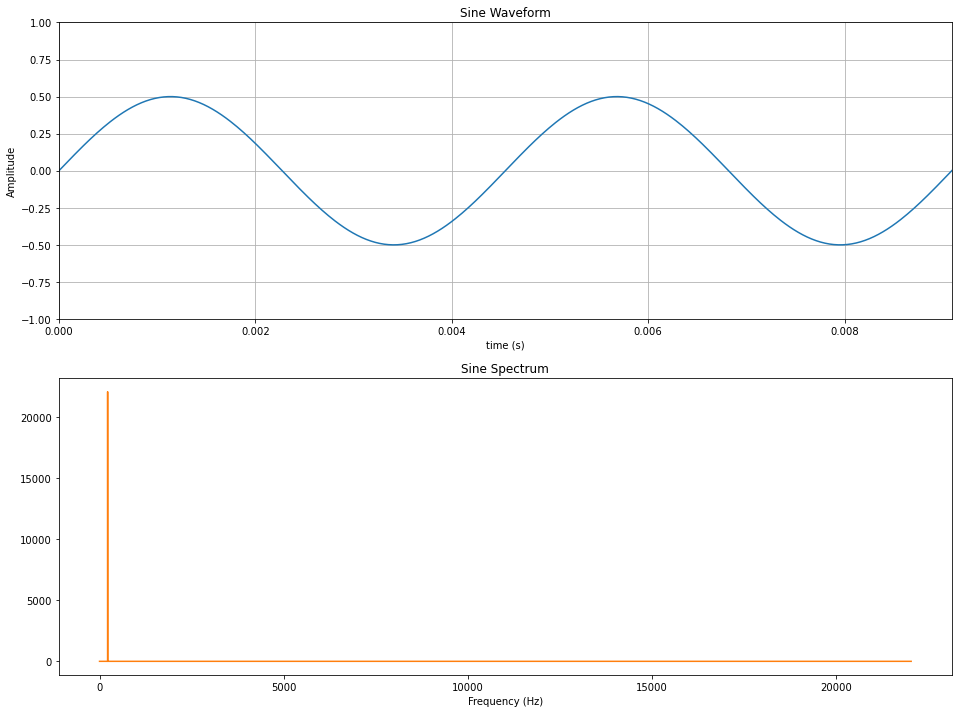

In [124]:
figure, axes = plt.subplots(nrows=2, ncols=1, figsize=(16, 12))
axes[0].plot(t, sine, label="Sine", color='C0')
axes[0].set_title('Sine Waveform')
axes[0].set_xlabel('time (s)')
axes[0].set_ylabel('Amplitude')
axes[0].grid(True)
axes[0].set_xlim(0, period*2)
axes[0].set_ylim(-1, 1)
axes[1].plot(xf, np.abs(yf), label="Sine", color='C1')
axes[1].set_title('Sine Spectrum')
axes[1].set_xlabel('Frequency (Hz)')
plt.show()

## Export the `sine` signal to  `.wav`

After generated the `sine` signal with `scipy` , we can export our signal with a resolution of `16bit` to `.wav` file using `scipy.wavfile`.

In [125]:
wavfile.write("sine.wav", sampling_rate, np.int16((sine / sine.max()) * 32767))

In [126]:
samplerate, data = wavfile.read('./sine.wav')

In [127]:
print(f'Data container: {type(data)}')
print(f'Data shape: {data.shape}')
print(f'Sampling rate: {samplerate}')
print(f'Bit depth: {data.dtype}')
print(f'Audio length: {data.size/samplerate} seconds')

Data container: <class 'numpy.ndarray'>
Data shape: (88200,)
Sampling rate: 44100
Bit depth: int16
Audio length: 2.0 seconds


In [128]:
sine = display.Audio("./sine.wav")
sine

# Square Signal

To generate a `square signal`, we can use the `square` function from `scipy` signal module.

## Generate Square Signal

In [136]:
# Set the x Axis (time)
t = np.linspace(0, length, sampling_rate * length, endpoint=False)
# Signal Amplitude (-1, 1)
Amplitude = 0.5
# Generate the square signal y Axis (Amplitude)
square = Amplitude*signal.square(2 * np.pi * frequency * t)

## Fast Fourier Transform

In [137]:
yf = rfft(square)
xf = rfftfreq(sampling_rate*length, 1 / sampling_rate)

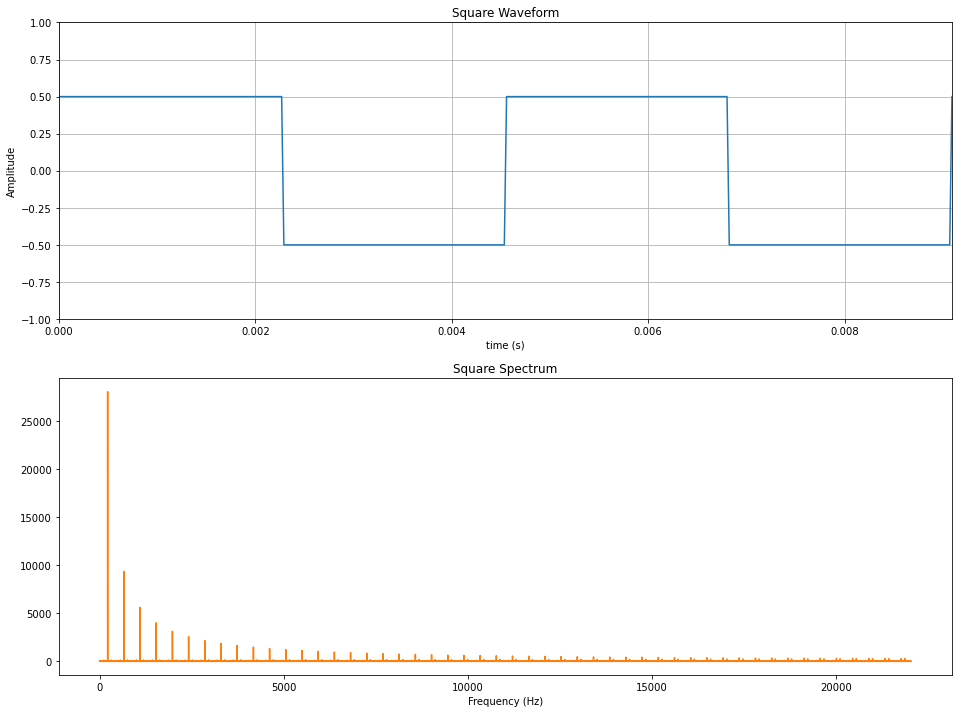

In [138]:
figure, axes = plt.subplots(nrows=2, ncols=1, figsize=(16, 12))
axes[0].plot(t, square, label="Square", color='C0')
axes[0].set_title('Square Waveform')
axes[0].set_xlabel('time (s)')
axes[0].set_ylabel('Amplitude')
axes[0].grid(True)
axes[0].set_xlim(0, period*2)
axes[0].set_ylim(-1, 1)
axes[1].plot(xf, np.abs(yf), label="Square", color='C1')
axes[1].set_title('Square Spectrum')
axes[1].set_xlabel('Frequency (Hz)')
plt.show()

## Export `square` signal to  `.wav`

After generated the `square` signal with `scipy` , we can export our signal with a resolution of `16bit` to `.wav` file using `scipy.wavfile`.

In [139]:
wavfile.write("square.wav", sampling_rate, np.int16((square / square.max()) * 32767))

In [140]:
samplerate, data = wavfile.read('./square.wav')

In [141]:
square = display.Audio("./square.wav")
square